# **Voting classifiers improve prediction accuracy**

This small project shows how voting system improve acc.

Multiple predictors predict n_sample samples and two voting classifiers outputs final decision based on majority vote (>0.5)

Prediction(probability or binary) correctness of each sample is simulated with a random number generation over a normal distribution between 0 (incorrect) and 1 (correct) with mean at 0.55. such that the population fraction (equals to the accuracy) of one predictor is > 0.5.

The output of the voting classifier is the mean of the votes from the predictors. An output > 0.5 means the correct votes of that sample is the majority and therefore the final decision of it is correct since majority wins.

Soft voting takes the prediction probablity output from the predictors. Hard voting takes the binary output classfied with threshold 0.5.




In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats


## **Prediction from one predictor**

In [0]:

n_samples=10000
acc=0.7
norm_mean =0.55

N=[1,3,5,11,21,51]

n_case = len(N)
np.random.seed(0)

def cal_norm_std(acc, mean):
  x=scipy.stats.norm.ppf(1-acc,mean,1)
  return (mean-0.5)/(mean-x)

std = cal_norm_std(acc,norm_mean)

In [0]:
# generate a prediction correctness distribution. 
# correctness = predict_prob when label=1 (TP); correctness = 1 - predict_prob when label=0 (TF)

# the functions return an array simulating the random correctness of the model prediction of each sample

def pred_sim(n_samples, mean, std):
    gen=np.random.normal(mean, std, n_samples)
    return 1.*(gen>0.5)    # output 1 or 0

def pred_sim_soft(n_samples, mean, std):
    return np.random.normal(mean, std, n_samples)   # otuput correct_prob



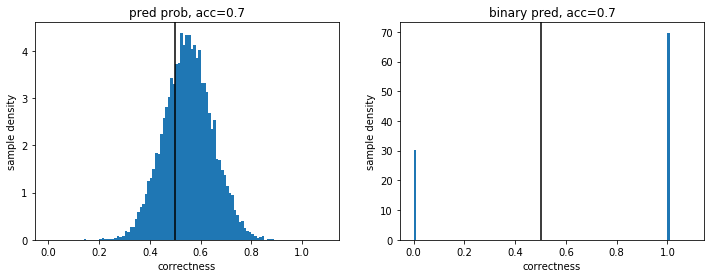

In [9]:
bins=np.arange(0,1.1,0.01)
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(pred_sim_soft(n_samples,norm_mean, std),bins=bins,density=True)
plt.xlabel('correctness')
plt.ylabel('sample density')
plt.axvline(x=0.5,color='k')
plt.title('pred prob, acc=' + str(acc))


plt.subplot(1,2,2)
plt.hist(pred_sim(n_samples, norm_mean, std),bins=bins,density=True)
plt.xlabel('correctness')
plt.ylabel('sample density')
plt.axvline(x=0.5,color='k')
plt.title('binary pred, acc=' + str(acc))

plt.show()

In TP case, correctness = pred_prob > 0.5

In TN case, correctness = (1 - pred_prob) > 0.5, e.g. pred_prob < 0.5

A sample with correctness > 0.5 is correctly predicted.

For prob output in the left figure, 70% of the prediction popluation are > 0.5, therefore acc=0.7

For the binary output in the right figure, 70% of the population is equal to 1, therefore acc=0.7.

## **Soft voting**



In [0]:
# soft voting
j=0
vote=[]
vote_acc=np.ones(n_case)
for n_models in N:
  ens = np.zeros(n_samples)

  for i in range(n_models):
    ens = ens + pred_sim_soft(n_samples, norm_mean,std)

  ens=ens/n_models
  vote.append(ens)
  vote_acc[j]=np.mean(1*(ens>=0.5))
  j+=1

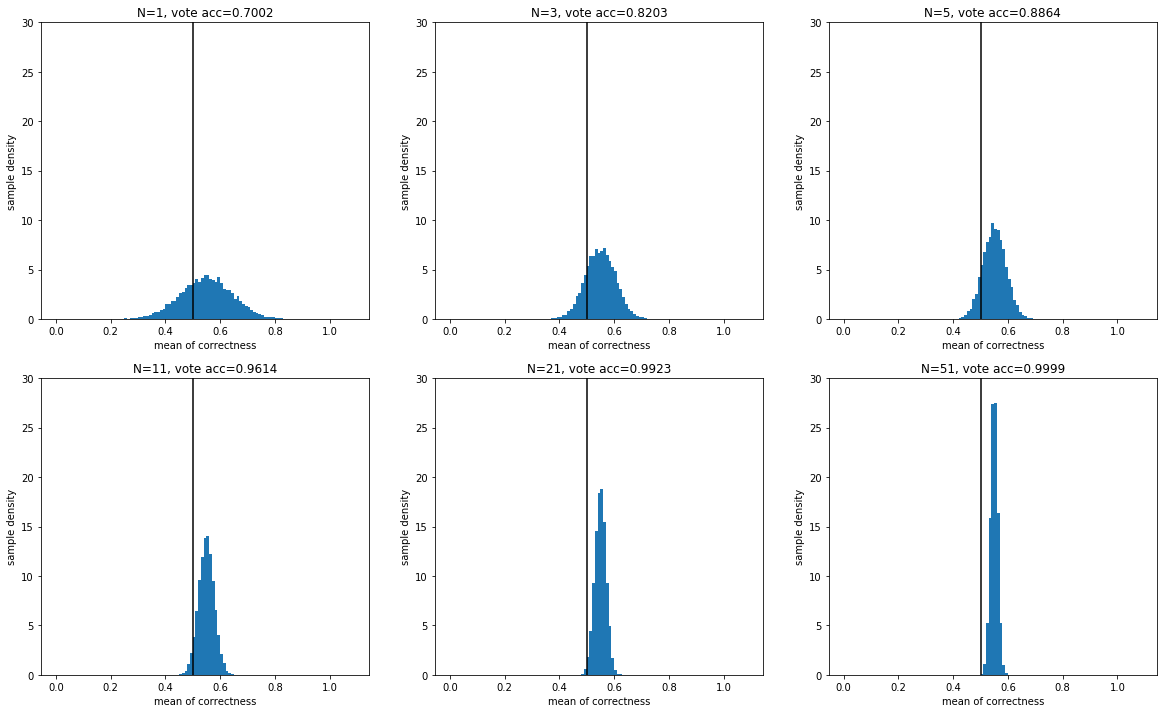

In [7]:
bins=np.arange(0,1.1,0.01)

plt.figure(figsize=(20,12))

for i in range(n_case):
  plt.subplot((n_case-1)//3+1,3,i+1)
  plt.hist(vote[i],label=None,bins=bins,density=True)
  plt.xlabel('mean of correctness')
  plt.ylabel('sample density')
  plt.ylim(0,30)
  plt.axvline(x=0.5,color='k')
  plt.title('N=' + str(N[i]) + ', vote acc=' + str(vote_acc[i]))

plt.show()

Soft voting takes the mean of pred prob for input. Histograms show that more population shift to > 0.5 domain while more predictors are used. This indicates  increasing of acc.

## **Hard voting**



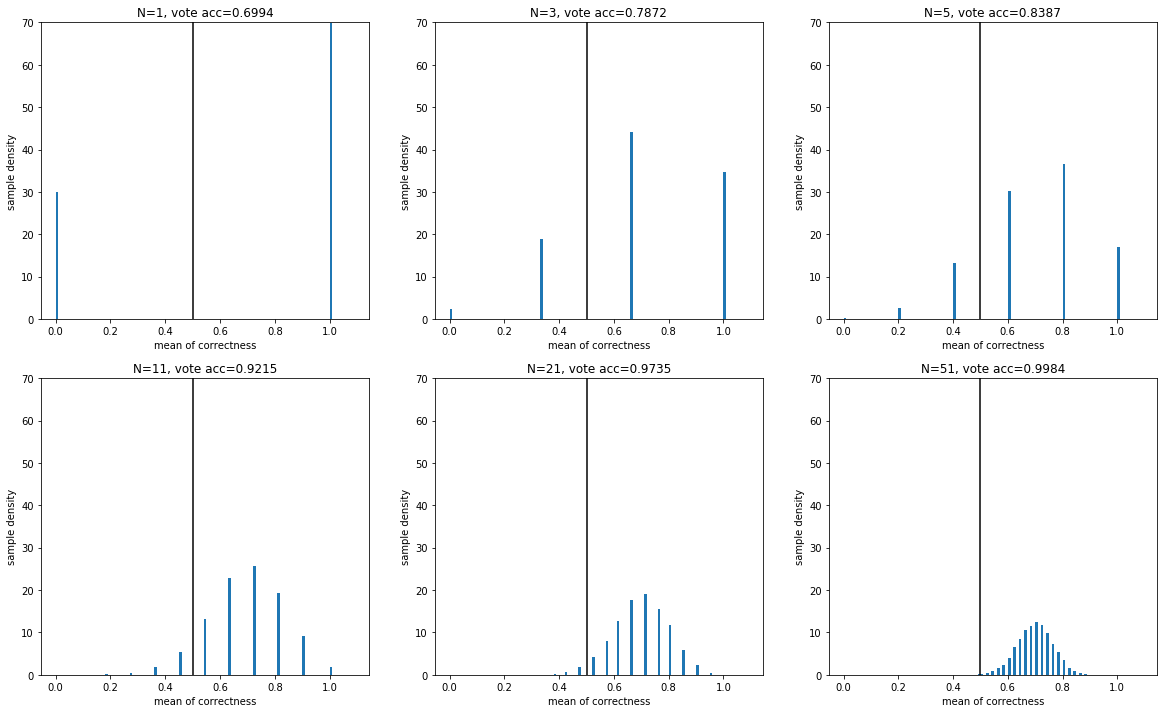

In [10]:
# hard voting
j=0
vote=[]
vote_acc=np.ones(n_case)
for n_models in N:
  ens = np.zeros(n_samples)

  for i in range(n_models):
    ens = ens + pred_sim(n_samples, norm_mean,std)

  ens=ens/n_models
  vote.append(ens)
  vote_acc[j]=np.mean(1*(ens>=0.5))
  j+=1

bins=np.arange(0,1.1,0.01)

plt.figure(figsize=(20,12))

for i in range(n_case):
  plt.subplot((n_case-1)//3+1,3,i+1)
  plt.hist(vote[i],label=None,bins=bins,density=True)
  plt.xlabel('mean of correctness')
  plt.ylabel('sample density')
  plt.ylim(0,70)
  plt.axvline(x=0.5,color='k')
  plt.title('N=' + str(N[i]) + ', vote acc=' + str(vote_acc[i]))

plt.show()

Hard voting takes the mean of binary correct_prob (0 or 1). 

While the output of voting > 0.5, it means that the correct predictions are the marjority. the hard voting system takes the marjority prediction.

Histograms show a binominal distribution of the sample correctness and that more population shift to > 0.5 domain while more predictors are used. This indicates the increasing of acc. 

The histogram bars appear sparse for small number of predictors (N) due to fewer combination of 0 and 1 voting.